## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [2]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [81] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [86] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [91] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [96] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
[101] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [4]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [5]:
#names(data2)
#These are only variables we really care about
IVS = c(
"Age",
"Atti",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"State",
"Summer_avgF",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "Atti"        "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Frugal"      "Gender"     
[11] "HabitC"      "HabitG"      "HomeS"       "HouseholdS"  "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"
[26] "Trust"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncHomeS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "State"       "SubNorm"     "Summer_avgF"

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [10]:
#data1 [is.na(data1$IncHomeS), ]

In [11]:
#summary(data1$IncHomeS)
#table(data1$IncHomeS)
#table(data1$HouseholdS)

In [12]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncHomeS"    "State"       "Age"         "Gender"     
 [6] "OwnRent"     "SqftCate"    "HouseholdS"  "Political"   "Ethnic"     
[11] "Income"      "Educ"        "Latitude"    "EnergyC"     "PBC"        
[16] "CashYN"      "MC"          "ComfNS"      "Atti"        "SubNorm"    
[21] "SN"          "HabitG"      "HabitC"      "Summer_avgF"

In [13]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [14]:
#convert all data to numeric values

sapply(data2,sd)

HomeS    IncHomeS       State         Age      Gender     OwnRent 
       3.82        1.76       17.04       11.23        0.50        0.51 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       1.13        1.21        0.85        0.35        1.98        1.12 
   Latitude     EnergyC         PBC      CashYN          MC      ComfNS 
       5.09        1.39        0.93        0.28        1.08        1.41 
       Atti     SubNorm          SN      HabitG      HabitC Summer_avgF 
       1.08        1.34        1.40        1.16        1.38        5.26

In [15]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.83
Summer_avgF,-0.83,1.00


In [16]:
#plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [40]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:25];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:25){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.12
    EnergyC   PBC    MC  Atti SubNorm HabitG HabitC
PC1   -0.38 -0.23 -0.33 -0.42   -0.35  -0.29  -0.25
[1] 0.22
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.29 0.34    0.47     0.49       0.23   0.37
[1] 0.3
    State Latitude ComfNS Summer_avgF
PC3  0.21     0.56  -0.24       -0.57
[1] 0.36
    State Political Ethnic Income PBC ComfNS HabitG StateCA
PC4  0.38     -0.36   0.34   -0.2 0.3   0.25   0.24   -0.47
[1] 0.42
    HomeS Gender HouseholdS  Educ   SN HabitC
PC5 -0.24   0.33       0.58 -0.49 0.23  -0.23
[1] 0.47
    HomeS IncHomeS   Age CashYN ComfNS HabitC
PC6  0.22    -0.51 -0.37  -0.34  -0.41   0.22
[1] 0.52
    State Political Educ EnergyC HabitG StateCA
PC7  0.44      0.37 0.25    0.23  -0.23   -0.52
[1] 0.56
    HomeS  Age Gender Income   PBC CashYN    MC HabitC
PC8  0.24 0.21   0.35  -0.32 -0.26  -0.54 -0.24   0.26
[1] 0.6
    State  Age Gender ComfNS SubNorm   SN
PC9  -0.2 -0.3   -0.3   0.33    0.31 0.59
[1] 0.64
     HomeS IncHomeS State Gender Ethni

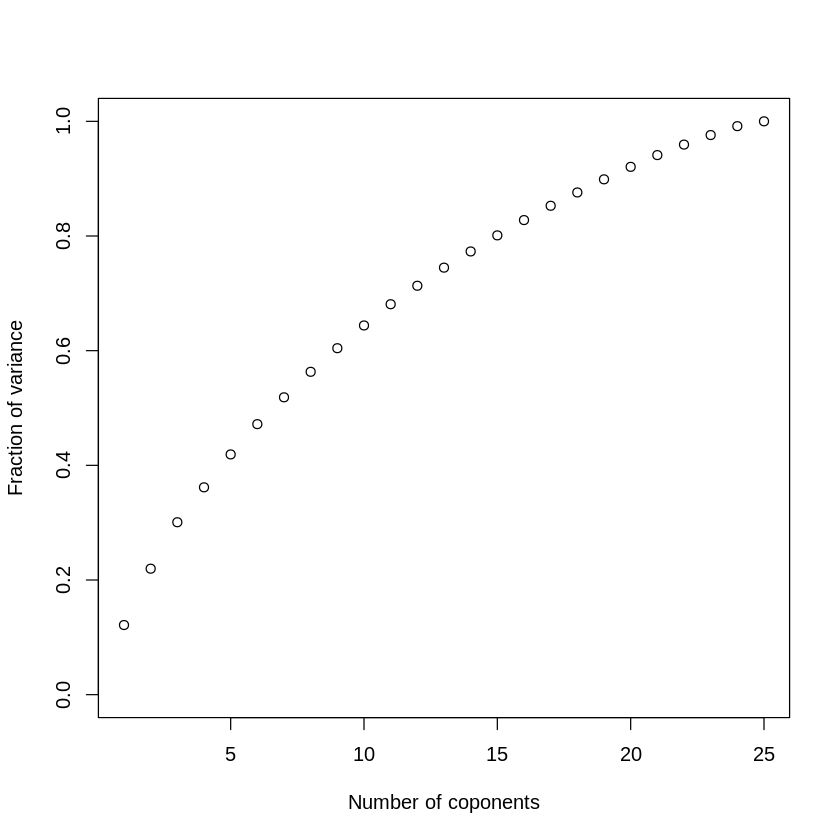

In [41]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [42]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [43]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,24,0.63
Latitude,13,0.61
Atti,19,0.45
SqftCate,7,0.42
EnergyC,14,0.39
OwnRent,6,0.36
Income,11,0.30
SubNorm,20,0.27
HouseholdS,8,0.26
MC,17,0.25
Age,4,0.24


In [44]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncHomeS       State         Age      Gender     OwnRent 
       0.90        0.97        0.96        1.00        0.92        0.99 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       0.99        0.99        0.94        0.96        0.99        0.98 
   Latitude     EnergyC         PBC      CashYN          MC      ComfNS 
       0.39        0.55        0.90        0.99        0.75        0.94 
       Atti     SubNorm          SN      HabitG      HabitC Summer_avgF 
       0.42        0.74        0.92        0.84        0.89        0.03 
    StateCA 
       0.99 

Loadings:
            Factor1 Factor2
EnergyC      0.64          
Atti         0.72          
Latitude            -0.76  
Summer_avgF          0.95  
HomeS                0.32  
IncHomeS                   
State                      
Age                        
Gender                     
OwnRent               

In [45]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [46]:
#Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#   Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avgF

In [47]:
#IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'MC', 'ComfNS', 'HabitC', 'Atti', 'SubNorm', 'PBC', 'Summer_avgF')
IndepPred = c('EnergyC', 'MC', 'ComfNS', 'HabitC')

In [48]:
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [49]:
table(data2[,"IncHomeS"])
data2$StateCA=data2$State==5
table(data2$StateCA)


  1   2   3   4   5   6   7   8 
 38  30  94 176  44  45  36  27 


FALSE  TRUE 
  469    21 

In [50]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.889 -1.061 -0.266  0.899  4.498 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.4540     0.5995    5.76  1.5e-08 ***
EnergyC      -0.0812     0.0576   -1.41     0.16    
MC           -0.0428     0.0741   -0.58     0.56    
ComfNS        0.3206     0.0552    5.80  1.2e-08 ***
HabitC       -0.0638     0.0573   -1.11     0.27    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 485 degrees of freedom
Multiple R-squared:  0.0845,	Adjusted R-squared:  0.0769 
F-statistic: 11.2 on 4 and 485 DF,  p-value: 1.09e-08


In [51]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,19.6,19.6,6.81,9.4e-03
MC,1,2.2,2.2,0.77,3.8e-01
ComfNS,1,103.3,103.3,35.94,4.0e-09
HabitC,1,3.6,3.6,1.24,2.7e-01
Residuals,485,1393.7,2.9,NA,NA


In [52]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>72)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    72)

Residuals:
   Min     1Q Median     3Q    Max 
-4.036 -1.005 -0.263  0.862  4.533 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7830     0.7205    5.25  2.7e-07 ***
EnergyC      -0.1069     0.0680   -1.57     0.12    
MC           -0.0922     0.0883   -1.04     0.30    
ComfNS        0.3494     0.0676    5.17  4.0e-07 ***
HabitC       -0.0784     0.0690   -1.14     0.26    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 341 degrees of freedom
Multiple R-squared:  0.104,	Adjusted R-squared:  0.0931 
F-statistic: 9.86 on 4 and 341 DF,  p-value: 1.47e-07


In [53]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,22.8,22.8,7.8,5.4e-03
MC,1,6.2,6.2,2.1,1.5e-01
ComfNS,1,81.9,81.9,28.2,2.0e-07
HabitC,1,3.8,3.8,1.3,2.6e-01
Residuals,341,990.8,2.9,NA,NA


In [54]:
#added CashYN to model
#IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'MC', 'ComfNS', 'HabitC', 'Summer_avgF', 'CashYN')
IndepPred = c('EnergyC', 'MC', 'ComfNS', 'HabitC', 'CashYN')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [55]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.948 -1.071 -0.254  0.886  4.465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.1646     0.6350    4.98  8.7e-07 ***
EnergyC      -0.0842     0.0576   -1.46     0.14    
MC           -0.0527     0.0744   -0.71     0.48    
ComfNS        0.3177     0.0552    5.75  1.6e-08 ***
HabitC       -0.0577     0.0574   -1.00     0.32    
CashYNTRUE    0.3784     0.2759    1.37     0.17    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 484 degrees of freedom
Multiple R-squared:  0.088,	Adjusted R-squared:  0.0786 
F-statistic: 9.34 on 5 and 484 DF,  p-value: 1.65e-08


In [56]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,19.6,19.6,6.82,9.3e-03
MC,1,2.2,2.2,0.77,3.8e-01
ComfNS,1,103.3,103.3,36.00,3.9e-09
HabitC,1,3.6,3.6,1.24,2.7e-01
CashYN,1,5.4,5.4,1.88,1.7e-01
Residuals,484,1388.3,2.9,NA,NA


In [57]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.768 -1.101 -0.276  1.051  4.506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.1952     0.9630    4.36  2.1e-05 ***
EnergyC      -0.2240     0.0873   -2.57    0.011 *  
MC           -0.1108     0.1177   -0.94    0.348    
ComfNS        0.4074     0.0810    5.03  1.1e-06 ***
HabitC       -0.0551     0.0834   -0.66    0.510    
CashYNTRUE    0.0525     0.4804    0.11    0.913    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6 on 208 degrees of freedom
Multiple R-squared:  0.169,	Adjusted R-squared:  0.149 
F-statistic: 8.46 on 5 and 208 DF,  p-value: 2.64e-07


In [58]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,38.975,38.975,14.429,1.9e-04
MC,1,3.919,3.919,1.451,2.3e-01
ComfNS,1,70.119,70.119,25.958,7.8e-07
HabitC,1,1.197,1.197,0.443,5.1e-01
CashYN,1,0.032,0.032,0.012,9.1e-01
Residuals,208,561.856,2.701,NA,NA


In [61]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>72)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    72)

Residuals:
   Min     1Q Median     3Q    Max 
-4.091 -1.018 -0.264  0.835  4.506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.5522     0.7627    4.66  4.6e-06 ***
EnergyC      -0.1079     0.0680   -1.59     0.11    
MC           -0.1066     0.0897   -1.19     0.24    
ComfNS        0.3490     0.0676    5.16  4.2e-07 ***
HabitC       -0.0726     0.0693   -1.05     0.30    
CashYNTRUE    0.3166     0.3422    0.93     0.36    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 340 degrees of freedom
Multiple R-squared:  0.106,	Adjusted R-squared:  0.0928 
F-statistic: 8.05 on 5 and 340 DF,  p-value: 3.4e-07


In [62]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
EnergyC,1,22.8,22.8,7.84,5.4e-03
MC,1,6.2,6.2,2.13,1.5e-01
ComfNS,1,81.9,81.9,28.16,2.0e-07
HabitC,1,3.8,3.8,1.29,2.6e-01
CashYN,1,2.5,2.5,0.86,3.6e-01
Residuals,340,988.3,2.9,NA,NA
